In [1]:
%load_ext sppl.magics
%matplotlib inline

In [2]:
%%sppl model
import scipy.stats

low  = {n : int(scipy.stats.binom.ppf(.01, n=n, p=.5)) for n in range(500, 1500)}
high = {n : int(scipy.stats.binom.ppf(.99, n=n, p=.5)) for n in range(500, 1500)}
num_people ~= uniformd(values=range(500, 1500, 20))

switch (num_people) cases (n in range(500, 1500, 20)):
    num_met ~= binom(n=n, p=.5)
    condition ((low[n] <= num_met) < high[n])
    switch (num_met) cases (m in range(low[n], high[n])):
        num_infected ~= binom(n=m, p=.3)

In [3]:
n = %sppl_get_namespace model

In [4]:
modelc = n.model.condition(n.num_infected << {100})

In [5]:
xs = range(250, 800, 20)
ys_prior = [n.model.prob(n.num_met << {i}) for i in xs]
ys_posterior = [modelc.prob(n.num_met << {i}) for i in xs]

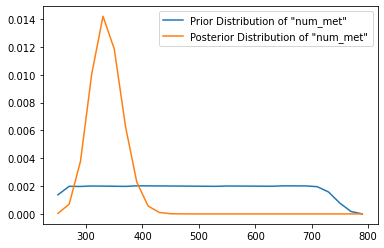

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(xs, ys_prior, label='Prior Distribution of "num_met"')
ax.plot(xs, ys_posterior, label='Posterior Distribution of "num_met"')
ax.legend(loc='upper right')